In [1]:
import pandas as pd

In [15]:
banned_keywords = list(pd.read_csv('./banned_keywords.csv')['words'])

banned = ['./banned_hate_leet_1.csv', './banned_hate_leet_2.csv', './banned_hate_lexvar.csv']
nonbanned_leet = ['./nonbanned_hate_leet_1.csv', './nonbanned_hate_leet_2.csv']
nonbanned_lexvar = ['./nonbanned_hate_lexvar.csv']

In [3]:
banned_lev = dict([])
nonbanned_lev = dict([])

In [4]:
!pip3 install python-Levenshtein

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [5]:
from Levenshtein import distance as lev

In [6]:
levarr_banned = []
for bl in banned:
    df = pd.read_csv(bl)
    wordlist = list(df['words'])
    for word in wordlist:
        minDist = 10000000
        for bword in banned_keywords:
            currDist = lev(word, bword)
            minDist = currDist if currDist < minDist else minDist
            
        levarr_banned.append(minDist)
        if minDist not in banned_lev.keys():
            banned_lev[minDist] = 1
        banned_lev[minDist] += 1

In [16]:
nonbanned_levarr = []
nonbanned_views = []
nonbanned_vidcount = []
nonbanned_len = []
for bl in nonbanned_leet:
    df = pd.read_csv(bl)
    wordlist = list(df['title'])
    for idx, word in enumerate(wordlist):
        minDist = 10000000
        for bword in banned_keywords:
            currDist = lev(word, bword)
            minDist = currDist if currDist < minDist else minDist
        
        nonbanned_levarr.append(minDist)
        nonbanned_views.append(df.iloc[idx]['viewCount'])
        nonbanned_vidcount.append(df.iloc[idx]['videoCount'])
        nonbanned_len.append(len(word))
        if minDist not in nonbanned_lev.keys():
            nonbanned_lev[minDist] = 1
        nonbanned_lev[minDist] += 1

In [18]:
print(np.average(nonbanned_levarr))
print(np.std(nonbanned_levarr))

1.28078250863061
0.4544740734326607


In [19]:
nonbanned_levarr = []
nonbanned_views = []
nonbanned_vidcount = []
nonbanned_len = []
for bl in nonbanned_lexvar:
    df = pd.read_csv(bl)
    wordlist = list(df['title'])
    for idx, word in enumerate(wordlist):
        minDist = 10000000
        for bword in banned_keywords:
            currDist = lev(word, bword)
            minDist = currDist if currDist < minDist else minDist
        
        nonbanned_levarr.append(minDist)
        nonbanned_views.append(df.iloc[idx]['viewCount'])
        nonbanned_vidcount.append(df.iloc[idx]['videoCount'])
        nonbanned_len.append(len(word))
        if minDist not in nonbanned_lev.keys():
            nonbanned_lev[minDist] = 1
        nonbanned_lev[minDist] += 1

In [20]:
print(np.average(nonbanned_levarr))
print(np.std(nonbanned_levarr))

1.7011568123393317
0.8701113592330842


In [10]:
nonbanned_views

[62,
 740,
 4501,
 35,
 8939,
 4612,
 10900,
 92500,
 6148,
 211800,
 3664,
 8600000,
 225100,
 5300000,
 41,
 4187,
 343,
 0,
 7914,
 0,
 382,
 369,
 1141,
 128,
 1218,
 316,
 1009,
 117,
 1046,
 3207,
 4570,
 65,
 402200,
 18300,
 48200,
 1056,
 39900,
 3416,
 7,
 1496,
 514,
 82800,
 238400,
 1238,
 52,
 5703,
 166400,
 43500,
 174,
 5271,
 1457,
 234,
 0,
 1961,
 2218,
 3386,
 8470,
 60200,
 16300,
 19100,
 97300,
 3600000,
 41100,
 1806,
 1694,
 43500,
 323600,
 2972,
 529,
 10100,
 4110,
 726,
 1335,
 5777,
 237300,
 246,
 28600,
 14000,
 385,
 169,
 18,
 131,
 731,
 1360,
 23,
 729,
 475,
 73,
 4143,
 11600,
 486,
 864500,
 8,
 48,
 227,
 21300,
 1278,
 1294,
 84,
 16500,
 46500,
 6978,
 135,
 190,
 1102,
 422,
 0,
 447,
 3600000,
 205500,
 2981,
 423,
 22900000,
 10300000000,
 2400000,
 70,
 438200000,
 2800000,
 1200000,
 789300,
 320,
 1,
 19100,
 561700000,
 692700000,
 4106,
 57900,
 679,
 3200,
 19,
 9066,
 102,
 120,
 8253,
 7300000,
 1834,
 55,
 1500000,
 248,
 0,
 34170

In [12]:
import numpy as np
np.average(nonbanned_len)

6.188722669735328

In [67]:
!pip3 install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [82]:
nonbanned_views

[62,
 740,
 4501,
 35,
 8939,
 4612,
 10900,
 92500,
 6148,
 211800,
 3664,
 8600000,
 225100,
 5300000,
 41,
 4187,
 343,
 0,
 7914,
 0,
 382,
 369,
 1141,
 128,
 1218,
 316,
 1009,
 117,
 1046,
 3207,
 4570,
 65,
 402200,
 18300,
 48200,
 1056,
 39900,
 3416,
 7,
 1496,
 514,
 82800,
 238400,
 1238,
 52,
 5703,
 166400,
 43500,
 174,
 5271,
 1457,
 234,
 0,
 1961,
 2218,
 3386,
 8470,
 60200,
 16300,
 19100,
 97300,
 3600000,
 41100,
 1806,
 1694,
 43500,
 323600,
 2972,
 529,
 10100,
 4110,
 726,
 1335,
 5777,
 237300,
 246,
 28600,
 14000,
 385,
 169,
 18,
 131,
 731,
 1360,
 23,
 729,
 475,
 73,
 4143,
 11600,
 486,
 864500,
 8,
 48,
 227,
 21300,
 1278,
 1294,
 84,
 16500,
 46500,
 6978,
 135,
 190,
 1102,
 422,
 0,
 447,
 3600000,
 205500,
 2981,
 423,
 22900000,
 10300000000,
 2400000,
 70,
 438200000,
 2800000,
 1200000,
 789300,
 320,
 1,
 19100,
 561700000,
 692700000,
 4106,
 57900,
 679,
 3200,
 19,
 9066,
 102,
 120,
 8253,
 7300000,
 1834,
 55,
 1500000,
 248,
 0,
 34170

In [110]:
count_1, bins_count_1 = np.histogram(nonbanned_views, bins = 1000)
count_2, bins_count_2 = np.histogram(nonbanned_vidcount, bins = 1000)

pdf_1 = count_1 / sum(count_1)
cdf_1 = np.cumsum(pdf_1)

pdf_2 = count_2 / sum(count_2)
cdf_2 = np.cumsum(pdf_2)

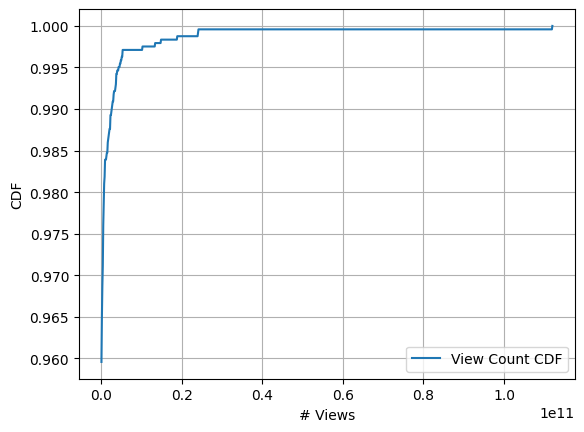

In [112]:
plt.plot(bins_count_1[1:], cdf_1, label = "View Count CDF")
plt.legend()
plt.xlabel('# Views')
plt.ylabel('CDF')
plt.grid()

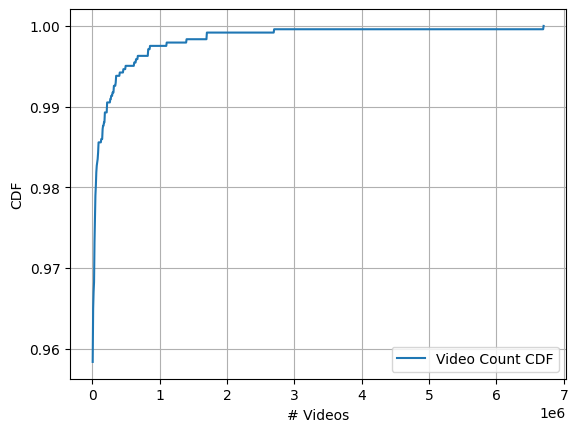

In [113]:
plt.plot(bins_count_2[1:], cdf_2, label = "Video Count CDF")
plt.legend()
plt.xlabel('# Videos')
plt.ylabel('CDF')
plt.grid()